# Exam on Convolutional Neural Networks (CNN)

Welcome to the Convolutional Neural Networks (CNN) practical exam. In this exam, you will work on an image classification task to predict the type of traffic sign. You are provided with a dataset of traffic sign images, and your task is to build, train, and evaluate a CNN model.

---

## Dataset Overview
### **Dataset:**
* Just run the command under the `Load Data` section to get the data downloaded and unzipped or you can access it [here](https://drive.google.com/file/d/1HwMV-Lt_sWoxc5v6igmTxTwomS3DR6cQ/view?usp=sharing)
### **Dataset Name:** Traffic Signs

### **Description:**  
The dataset contains images of various German traffic signs labeled for classification purposes. Each image belongs to one of the 43 classes, representing different types of traffic signs.

### **Labels:**
```python
classes = {
    0:  'Speed limit (20km/h)',
    1:  'Speed limit (30km/h)',
    2:  'Speed limit (50km/h)',
    3:  'Speed limit (60km/h)',
    4:  'Speed limit (70km/h)',
    5:  'Speed limit (80km/h)',
    6:  'End of speed limit (80km/h)',
    7:  'Speed limit (100km/h)',
    8:  'Speed limit (120km/h)',
    9:  'No passing',
    10: 'No passing veh over 3.5 tons',
    11: 'Right-of-way at intersection',
    12: 'Priority road',
    13: 'Yield',
    14: 'Stop',
    15: 'No vehicles',
    16: 'Veh > 3.5 tons prohibited',
    17: 'No entry',
    18: 'General caution',
    19: 'Dangerous curve left',
    20: 'Dangerous curve right',
    21: 'Double curve',
    22: 'Bumpy road',
    23: 'Slippery road',
    24: 'Road narrows on the right',
    25: 'Road work',
    26: 'Traffic signals',
    27: 'Pedestrians',
    28: 'Children crossing',
    29: 'Bicycles crossing',
    30: 'Beware of ice/snow',
    31: 'Wild animals crossing',
    32: 'End speed + passing limits',
    33: 'Turn right ahead',
    34: 'Turn left ahead',
    35: 'Ahead only',
    36: 'Go straight or right',
    37: 'Go straight or left',
    38: 'Keep right',
    39: 'Keep left',
    40: 'Roundabout mandatory',
    41: 'End of no passing',
    42: 'End no passing veh > 3.5 tons'
}
```



## Load Data
Run the following command to get the data and unzip it, alternatively you can access the data [here](https://drive.google.com/file/d/1HwMV-Lt_sWoxc5v6igmTxTwomS3DR6cQ/view?usp=sharing).

In [1]:
#https://drive.google.com/file/d/1HwMV-Lt_sWoxc5v6igmTxTwomS3DR6cQ/view?usp=sharing
!pip install gdown
!gdown --id 1HwMV-Lt_sWoxc5v6igmTxTwomS3DR6cQ
!unzip Traffic_Signs.zip

Streaming output truncated to the last 5000 lines.
 extracting: Traffic_Signs/Dataset/13/00013_00004_00022.png  
  inflating: Traffic_Signs/Dataset/13/00013_00021_00029.png  
  inflating: Traffic_Signs/Dataset/13/00013_00003_00023.png  
 extracting: Traffic_Signs/Dataset/13/00013_00063_00007.png  
 extracting: Traffic_Signs/Dataset/13/00013_00034_00029.png  
  inflating: Traffic_Signs/Dataset/13/00013_00045_00013.png  
  inflating: Traffic_Signs/Dataset/13/00013_00068_00019.png  
 extracting: Traffic_Signs/Dataset/13/00013_00003_00004.png  
 extracting: Traffic_Signs/Dataset/13/00013_00017_00010.png  
 extracting: Traffic_Signs/Dataset/13/00013_00046_00003.png  
  inflating: Traffic_Signs/Dataset/13/00013_00057_00008.png  
 extracting: Traffic_Signs/Dataset/13/00013_00058_00011.png  
 extracting: Traffic_Signs/Dataset/13/00013_00063_00017.png  
 extracting: Traffic_Signs/Dataset/13/00013_00002_00013.png  
 extracting: Traffic_Signs/Dataset/13/00013_00002_00006.png  
  inflating: Traffi

## Import Libraries

In [2]:
import tensorflow as tf
import pandas as pd
import numpy as np
from tensorflow.keras import layers
from keras.src.legacy.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from keras.preprocessing import image
from keras import models
from keras.optimizers import Adam
from tensorflow import keras
import os
import random
from matplotlib.image import imread
from PIL import Image
import cv2
import matplotlib.pyplot as plt

## Data Preprocessing
In this section, preprocess the dataset by:
- Loading the images from the file paths.
- Resizing the images to a consistent size.
- Normalizing pixel values.

Add more if needed!

In [3]:
# Outlining the data path, image height and width, number of channels (rgb), and number of categories
data_dir = "/content/Traffic_Signs"

IMG_HEIGHT = 30
IMG_WIDTH = 30
channels = 3
NUM_CATEGORIES = 43

In [4]:
# This for loop loops through the file directory getting the image and its label one by one and the transferring it into an array for data split
x = []
y = []

for i in range(NUM_CATEGORIES):
    dataset_path = os.path.join(data_dir, 'Dataset', str(i))

    for img_name in os.listdir(dataset_path):
        image_path = os.path.join(dataset_path, img_name)

        try:
            image = cv2.imread(image_path)
            if image is None:
                raise ValueError(f"Failed to load image {img_name}")

            image_rescale = Image.fromarray(image, 'RGB').resize((IMG_HEIGHT, IMG_WIDTH))
            x.append(np.array(image_rescale))
            y.append(i)

        except Exception as e:
            print(f"Error processing {img_name}: {e}")

x = np.array(x)
y = np.array(y)

print(f"Image shape: {x.shape}")
print(f"Label shape: {y.shape}")

Image shape: (39209, 30, 30, 3)
Label shape: (39209,)


## Data Splitting
In this section, we will split our dataset into three parts:

* Training set (70%).
* Validation set (15%).
* Test set (15%).

In [25]:
# Splitting into training validation and testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=42)

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.1765, random_state=42)

y_train = keras.utils.to_categorical(y_train, NUM_CATEGORIES)
y_val = keras.utils.to_categorical(y_val, NUM_CATEGORIES)
y_test = keras.utils.to_categorical(y_test, NUM_CATEGORIES)

## Building the CNN Model
In this section, define the architecture of the CNN model. The architecture may consist of:
- Convolutional layers with max-pooling
- Dropout layers
- Flatten layer
- Dense layers
- Output layer

Add and remove any of these as needed!

In [8]:
# This cnn model contains three different layers, 2 being convolutional and 1 being the final dense output layer
traffic_model = models.Sequential([
    # Layer 1
    keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(IMG_HEIGHT,IMG_WIDTH,channels)),
    keras.layers.Conv2D(32, (3, 3), activation='relu'),
    keras.layers.MaxPool2D((2, 2)),
    keras.layers.BatchNormalization(axis=-1),

    # Layer 2
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.Conv2D(128, (3, 3), activation='relu'),
    keras.layers.MaxPool2D((2, 2)),
    keras.layers.BatchNormalization(axis=-1),
    # Layer 3
    keras.layers.Flatten(),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(43, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Training the Model
Train the CNN model using the training data and validate it on the validation set.

In [9]:
# Tuned the epochs and learning rate to get the best accuracy and and compilled the model alongside the summary
epochs = 30
lr = 0.001
opt = Adam(learning_rate=lr, decay=lr / (epochs * 0.5))

traffic_model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
traffic_model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/base_optimizer.py:33: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 28, 16)          │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 26, 26, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 13, 13, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 9, 9, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 4, 4, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       1,049,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 43)                  │          22,059 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,171,275 (4.47 MB)

 Trainable params: 1,169,931 (4.46 MB)

 Non-trainable params: 1,344 (5.25 KB)

In [11]:
# Data augmentation before fitting the model create more harder training cases and to prevent overfitting
Data_generator_train = ImageDataGenerator(
    rotation_range = 40,
    width_shift_range=0.2,
    height_shift_range =0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

traffic_history = traffic_model.fit(Data_generator_train.flow(x_train, y_train, batch_size=32), epochs=epochs, validation_data=(x_val, y_val))

Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


858/858 ━━━━━━━━━━━━━━━━━━━━ 101s 114ms/step - accuracy: 0.1707 - loss: 3.5616 - val_accuracy: 0.5810 - val_loss: 1.3573
Epoch 2/30
858/858 ━━━━━━━━━━━━━━━━━━━━ 143s 115ms/step - accuracy: 0.4885 - loss: 1.6668 - val_accuracy: 0.6782 - val_loss: 0.9950
Epoch 3/30
858/858 ━━━━━━━━━━━━━━━━━━━━ 142s 116ms/step - accuracy: 0.6619 - loss: 1.0500 - val_accuracy: 0.8292 - val_loss: 0.5003
Epoch 4/30
858/858 ━━━━━━━━━━━━━━━━━━━━ 141s 115ms/step - accuracy: 0.7447 - loss: 0.7762 - val_accuracy: 0.8096 - val_loss: 0.5565
Epoch 5/30
858/858 ━━━━━━━━━━━━━━━━━━━━ 141s 114ms/step - accuracy: 0.7980 - loss: 0.6168 - val_accuracy: 0.9244 - val_loss: 0.2402
Epoch 6/30
858/858 ━━━━━━━━━━━━━━━━━━━━ 100s 116ms/step - accuracy: 0.8375 - loss: 0.5095 - val_accuracy: 0.9271 - val_loss: 0.2086
Epoch 7/30
858/858 ━━━━━━━━━━━━━━━━━━━━ 99s 115ms/step - accuracy: 0.8579 - loss: 0.4343 - val_accuracy: 0.9490 - val_loss: 0.1448
Epoch 8/30
858/858 ━━━━━━━━━━━━━━━━━━━━ 142s 116ms/step - accuracy: 0.8690 - loss: 0.393

## Evaluate the Model
Evaluate the performance of the model on the test set.

In [12]:
# Model evaluation
traffic_model.evaluate(x_test, y_test)

184/184 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 0.9688 - loss: 0.1033


[0.10433579236268997, 0.9671880602836609]

## Make Predictions
Use the trained model to make predictions on new or unseen traffic sign images.

if you need new, we prepared some data for you [here](https://drive.google.com/file/d/1S_vpQntND9839x8kJpegaEgtSIA4JxHO/view?usp=sharing), or you can simply run the following command to get the data and unzip it.

<small>Note: please note that the file contain MetaData to tell you what each image contains <b>THIS IS JUST FOR YOU TO MAKE SURE</b></smmall>

In [14]:
#https://drive.google.com/file/d/1S_vpQntND9839x8kJpegaEgtSIA4JxHO/view?usp=sharing
!gdown --id 1S_vpQntND9839x8kJpegaEgtSIA4JxHO
!unzip Test_Dataset.zip

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Failed to retrieve file url:

	Too many users have viewed or downloaded this file recently. Please
	try accessing the file again later. If the file you are trying to
	access is particularly large or is shared with many people, it may
	take up to 24 hours to be able to view or download the file. If you
	still can't access a file after 24 hours, contact your domain
	administrator.

You may still be able to access the file from the browser:

	https://drive.google.com/uc?id=1S_vpQntND9839x8kJpegaEgtSIA4JxHO

but Gdown can't. Please check connections and permissions.
unzip:  cannot find or open Test_Dataset.zip, Test_Dataset.zip.zip or Test_Dataset.zip.ZIP.


In [ ]:
!unzip Test_Dataset.zip

In [29]:
# Final model accuracy on the test cases which the model has not seen
y_pred = np.argmax(traffic_model.predict(x_test), axis=-1)
y_test = np.argmax(y_test, axis=-1)
accuracy = accuracy_score(y_test, y_pred) * 100
print(f'Unseen data accuracy: {accuracy:.2f}%')

184/184 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step
Unseen data accuracy: 96.72%


## Model Performance Visualization
Visualize performance metrics such as accuracy and loss over the epochs.

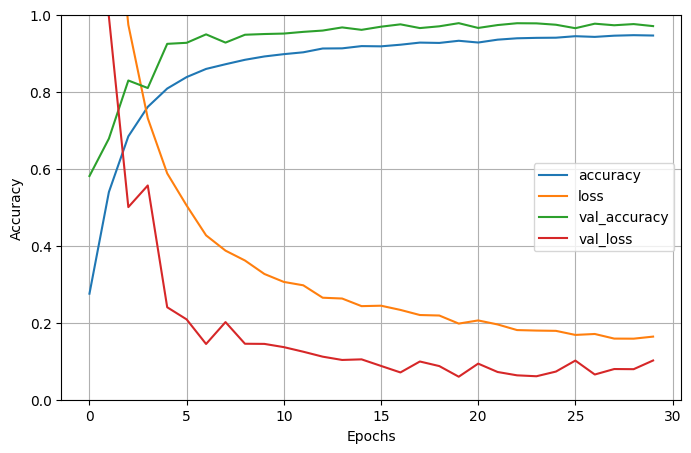

In [18]:
# Graph that outlines the accuracy and loss over the incremental epoch values
pd.DataFrame(traffic_history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

## Save the Model
Save the trained CNN model for submission.

In [30]:
# Saves the model
models.save_model(traffic_model, 'traffic_model.h5')

## Project Questions:

1. **Data Preprocessing**: Explain why you chose your specific data preprocessing techniques (e.g., resizing images, normalization, data augmentation). How do these preprocessing steps improve the performance of your CNN model?
2. **Model Architecture**: Describe the architecture of your CNN model (e.g., number of convolutional layers, kernel sizes, pooling layers). Why did you choose this structure, and how do you expect each layer to contribute to feature extraction?
3. **Activation Functions**: Justify your choice of activation functions. How do they influence the training and output of your CNN?
4. **Training Process**: Discuss your choice of batch size, number of epochs, and optimizer. How did these decisions impact the training process and the convergence of the model?
5. **Loss Function and Metrics**: Explain why you chose the specific loss function and evaluation metrics for this classification task. How do they align with the goal of correctly classifying traffic signs?
6. **Regularization Techniques**: If you used regularization methods like dropout or batch normalization, explain why you implemented them and how they helped prevent overfitting in your model.
7. **Model Evaluation**: Justify the method you used to evaluate your model's performance on the test set. Why did you select these evaluation techniques, and what insights did they provide about your model's accuracy and generalization ability?
8. **Model Visualization**: Explain the significance of the performance visualizations (e.g., accuracy and loss curves). What do they tell you about your model's training process and its ability to generalize?
9. **Overfitting and Underfitting**: Analyze whether the model encountered any overfitting or underfitting during training. What strategies could you implement to mitigate these issues?

### Answer Here:

Models Performence: Training 94.4%, Validation 97%, Test 96.72%

Data Preprocessing:
The reason why I chose label and one hot encoding and scaling is because these 3 preprocessing tools are the best in helping normalise the data. these helped by transforming all the categorical features into numerical features.

Model Architecture:
I believe that this architecture is the most appropriate due to its scale being high but not too high for overfitting and due to the limitation of time and computer power, this was the best small scale model.

Activation Functions:
ReLU was the chose activation function mainly because of its unique feature to ignore negative values and softmax was used for the output layer since this is a multiclass classification problem.

Training process:
I chose 32 batch size as I do not want to use more memory from the colab environment which causes it to slow down in some cases, the epoch values were chosen because increasing them past 30 will yield no better results and take more time, finally, adam optimiser is used because it ran stable on the training.

Loss function and metrics:
Loss function was categorical cross entropy (and not sparse categorical) since as stated before this is a multiclass classification task, and accuracy was used as a metric to simplify the performance evaluation.

Regularisation techniques:
I implemented these regularisation techniques to avoid overfitting and this can be seen from the val accuracy not being lower than the training accuracy.

Model Evaluation:
The reason why I chose accuracy was because it would be the easiest method to visualise quickly how well the model does, rather then having to seperate measurements.

Overfitting and underfitting:
There was no over/underfitting in the model.

